# Visualisation of data for demand modelisation


In [35]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import scipy

In [119]:
temperature_file = r'C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA\TSA_0001.nc' 
temperature_data = xr.open_dataset(temperature_file)

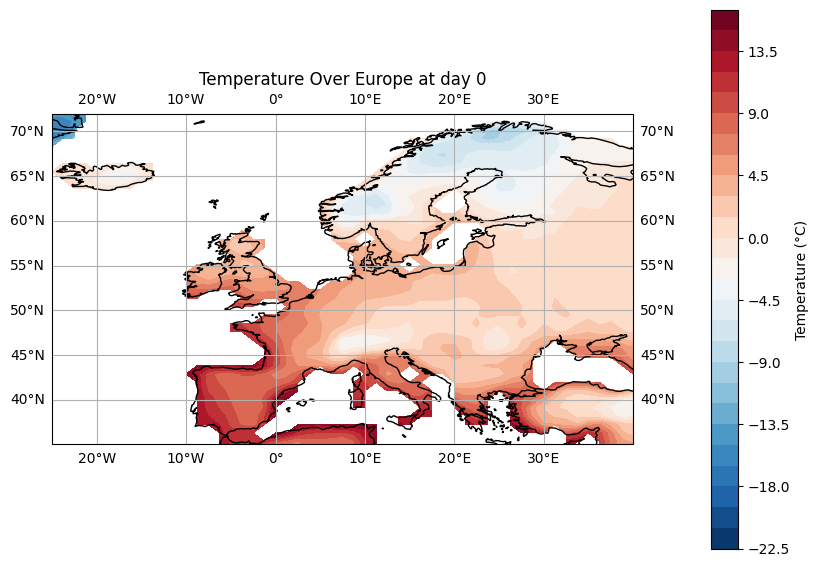

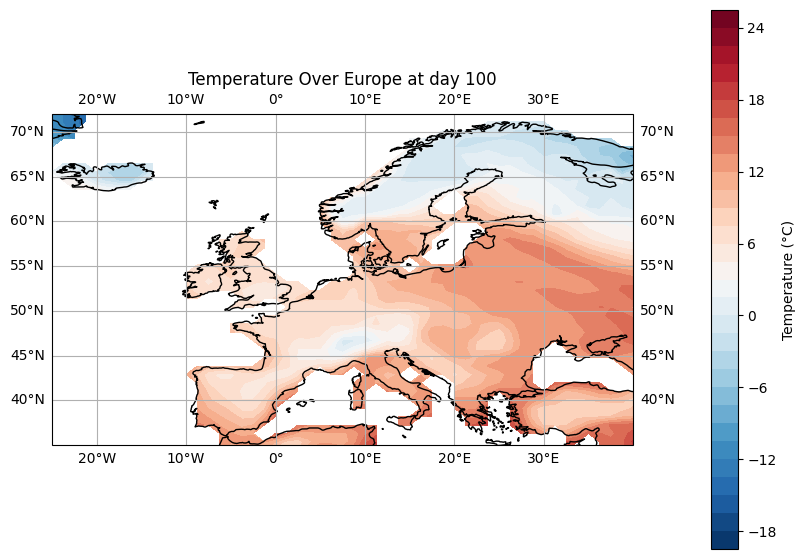

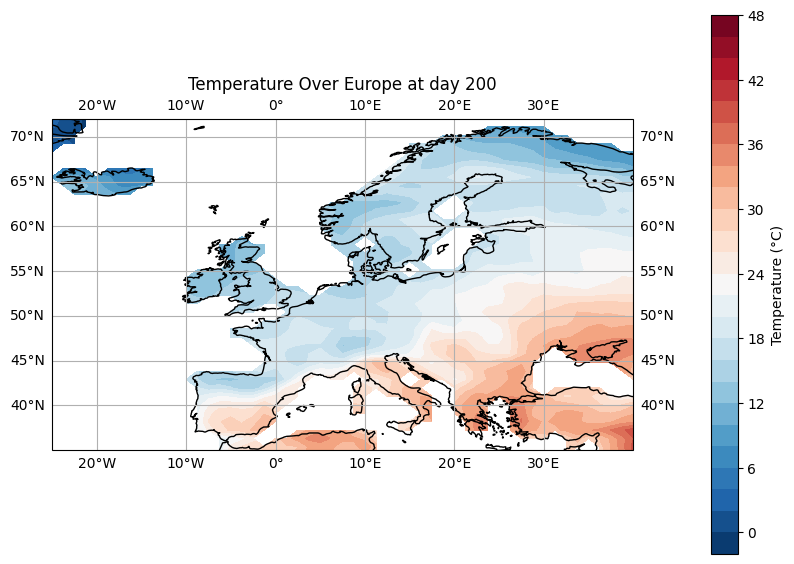

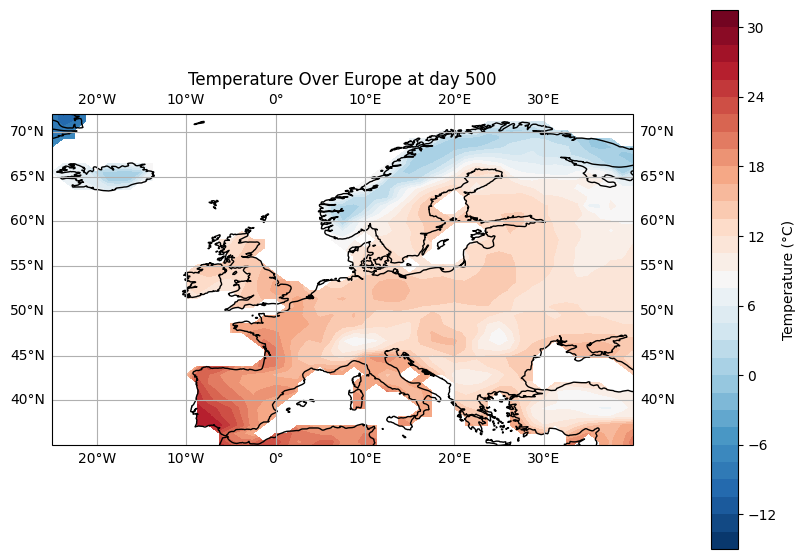

In [109]:
# Check Temperature spread over EU
# Select a single time step
days = [0, 100, 200, 500]
for i in days: 
    single_time_step = temperature_data.TSA.isel(time=i)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set the extent to Europe
    ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe

    # Add map features
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # plot with filled contours countourf
    c_c = ax.contourf(temperature_data.lon, temperature_data.lat, single_time_step - 273.15, cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=30)

    # Add a colorbar
    fig.colorbar(c_c, ax=ax, orientation='vertical', label='Temperature (°C)', pad = 0.1)

    # Title
    ax.set_title(f"Temperature Over Europe at day {i}")

    # Show the plot
    plt.show()

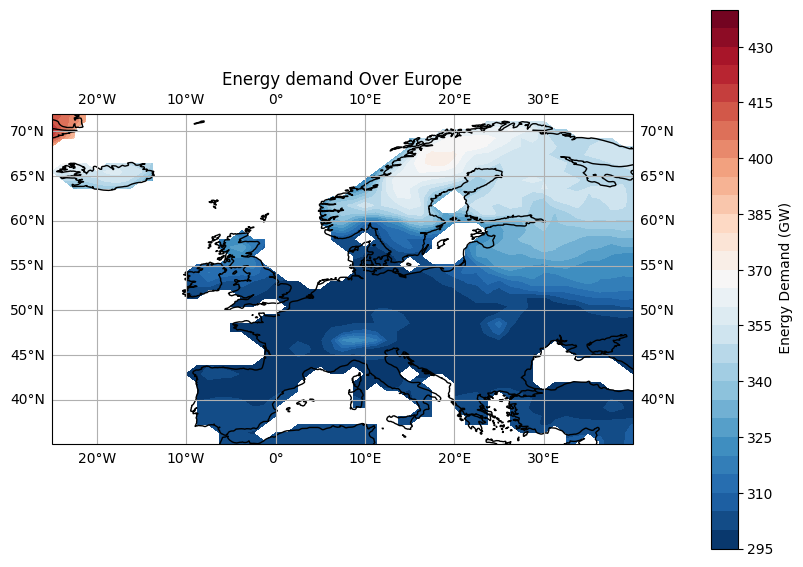

In [110]:
# Check Temperature spread over EU non weighted by population
# Select a single time step
single_time_step = temperature_data.TSA.isel(time=1000)
temperatures = single_time_step - 273.15 # Convert to Celsius

# Parameters
alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
zeta, c = 0.52, 11.17         # 1/°C and °C

# Calculate the F(t) and Demand(t) values
F_t = 1 / (1 + np.exp(-zeta * (temperatures - c)))  # Smoothing function

# Étape 3: Calculer la demande en fonction de T_pop et F(t)
demand = (alpha_1 + beta_1 * temperatures) * (1 - F_t) + (alpha_2 + beta_2 * temperatures) * F_t

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent to Europe
ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe

# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)

# plot with filled contours countourf
c_c = ax.contourf(demand.lon, demand.lat, demand, cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=30)

# Add a colorbar
fig.colorbar(c_c, ax=ax, orientation='vertical', label=' Energy Demand (GW)', pad = 0.1)

# Title
ax.set_title("Energy demand Over Europe")

# Show the plot
plt.show()

Weighted try

In [120]:
# File paths
path_population = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\region_mask\gpw_v4_population_density_rev11_30_min_2020.nc"
path_temperature = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA\TSA_0010.nc"

# Load datasets
population = xr.open_dataset(path_population)
temperature = xr.open_dataset(path_temperature)

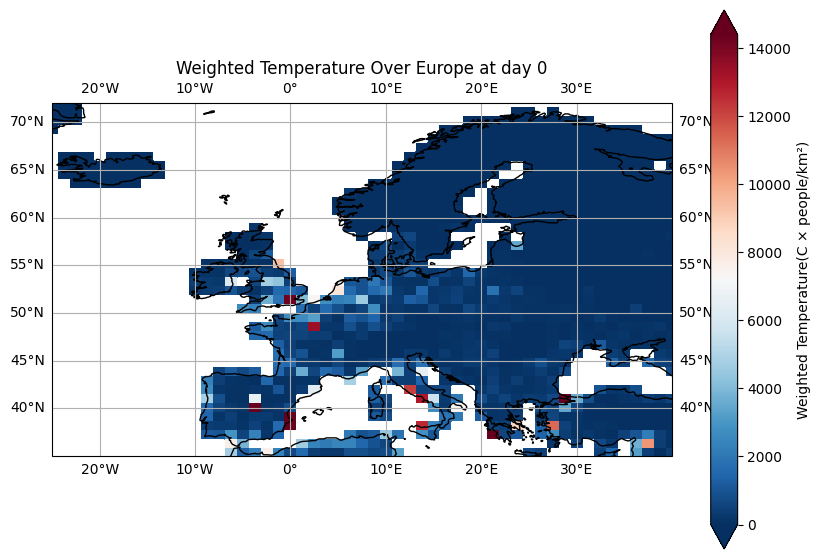

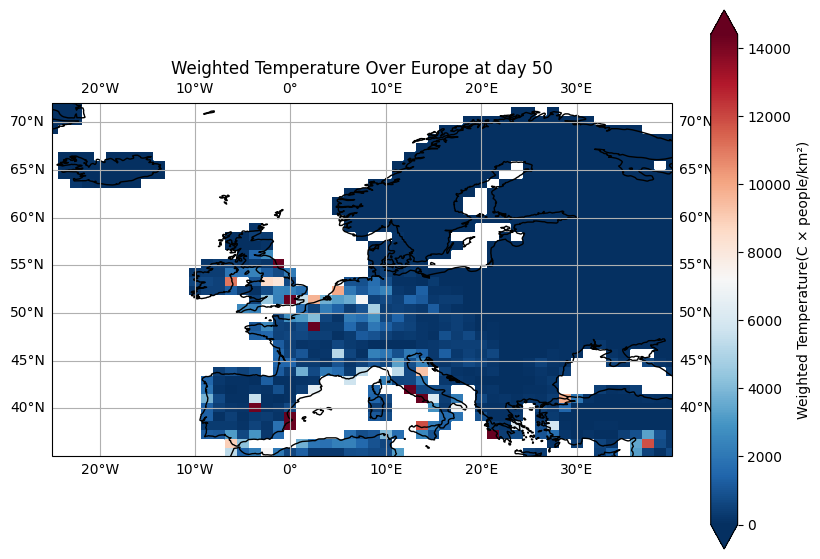

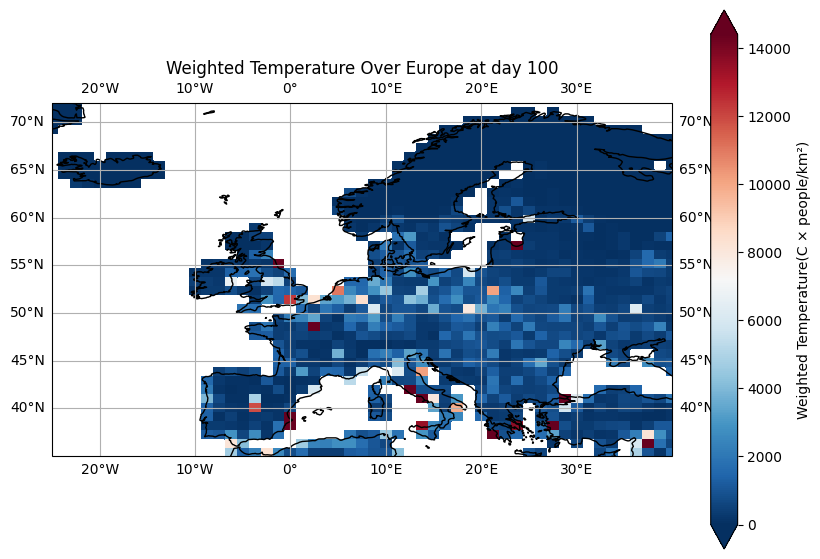

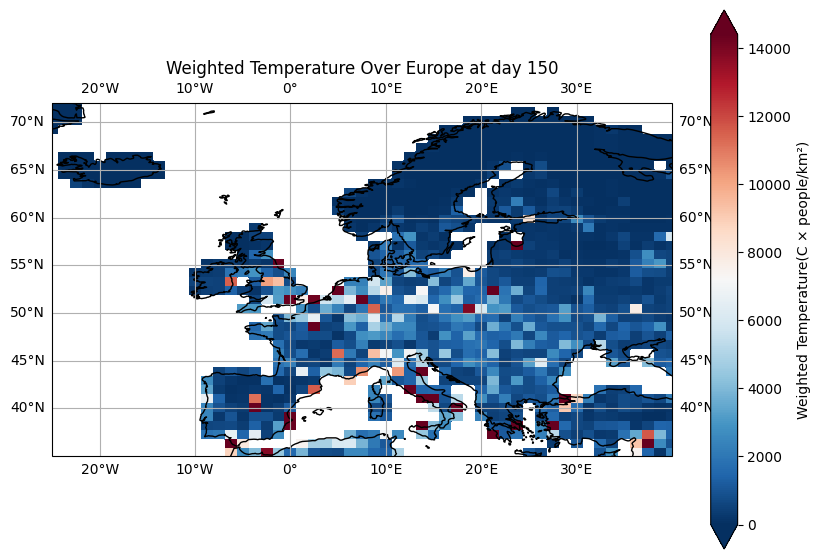

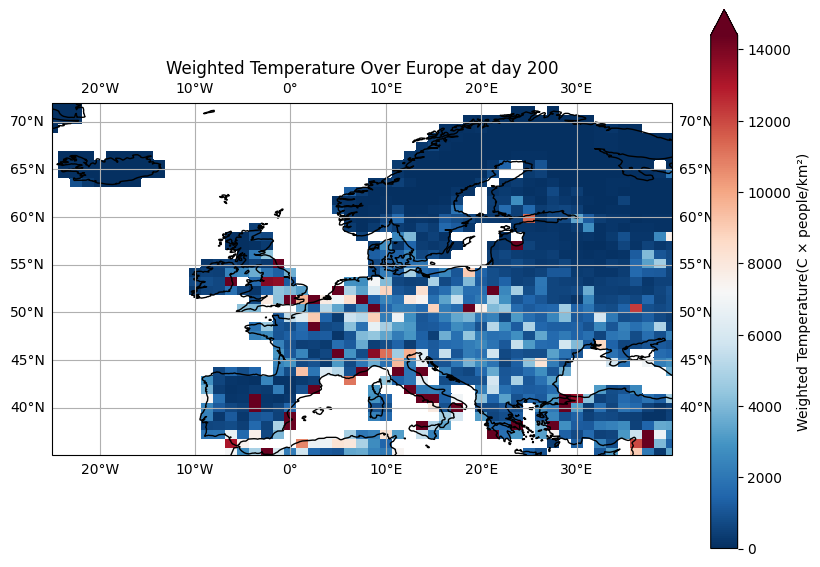

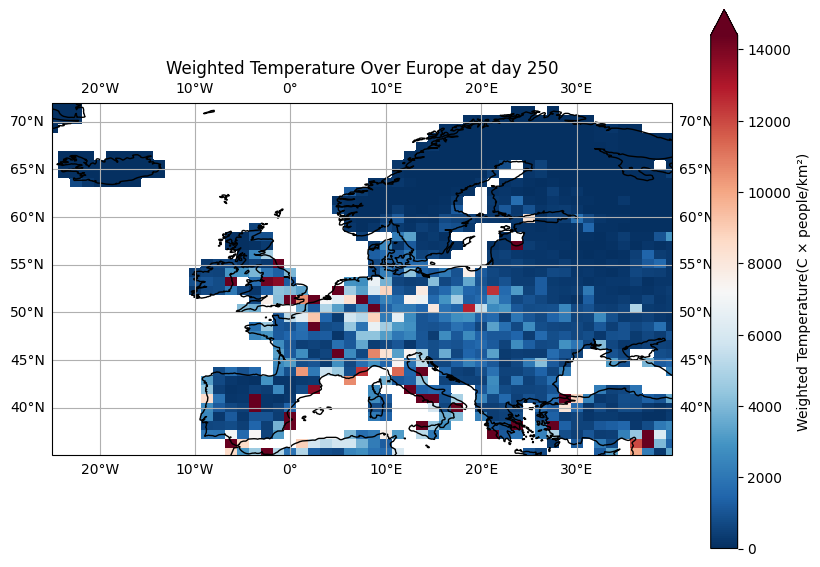

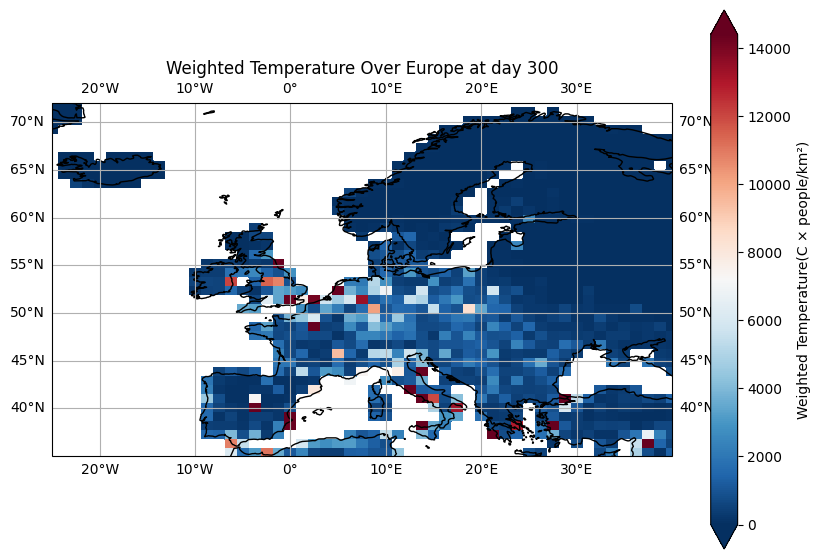

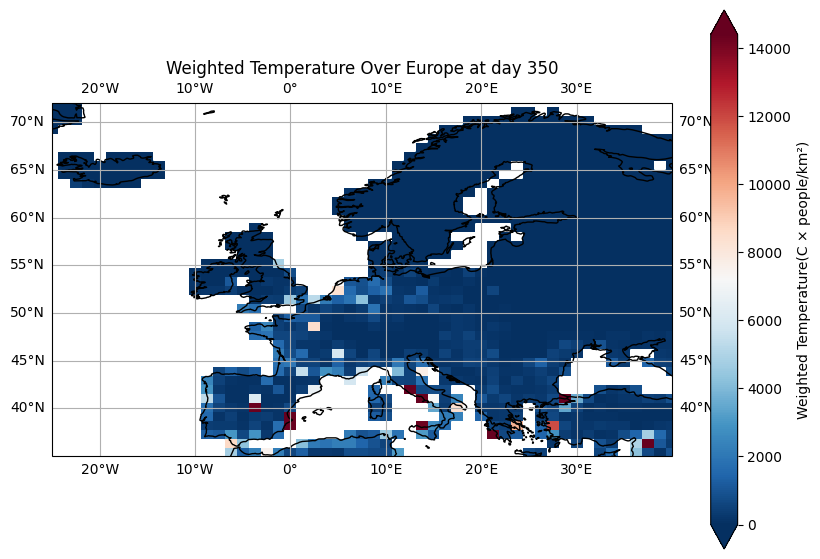

In [124]:
#Temp weighted by population
# Clip the values between 0 and 2000 for scenario_pop
population = population.clip(0, 2000)

# Variable name for population data
var = "Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"
days = [0, 50, 100, 150, 200, 250, 300, 350]
for i in days:
    # Select a single time step for temperature and population
    temp = temperature.TSA.isel(time = i)
    pop = population[var].isel(time=0)

    # Interpolate population data to match the temperature grid
    pop_interp = pop.interp(latitude=temp.lat, longitude=temp.lon, method='nearest')

    # Convert temperature from Kelvin to Celsius
    temp_celsius = temp - 273.15

    # Compute weighted temperature
    temp_weighted = temp_celsius * pop_interp

    # Plotting the weighted temperature
    fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set the extent to Europe
    ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe

    # Add map features
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Plot the weighted temperature data
    c_c = ax.contourf(temp_weighted.lon, temp_weighted.lat, temp_weighted, cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=30)

    # Add a colorbar

    temp_weighted.plot(vmin = 0, vmax = 14400, cmap='RdBu_r', ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Weighted Temperature(C × people/km²)'})

    # Title
    ax.set_title("Weighted Temperature Over Europe at day {}".format(i))

    # Show the plot
    plt.show()

c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


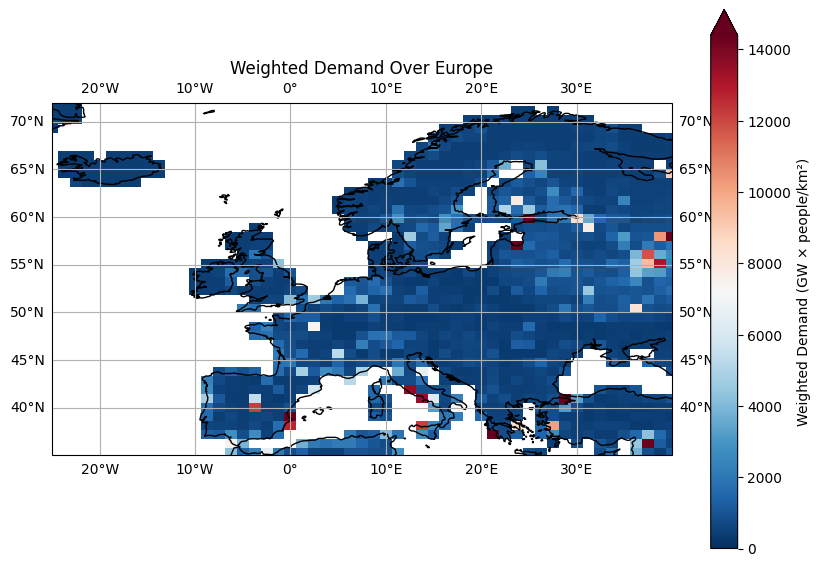

In [125]:
    # Demand 

    # Parameters
    alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
    alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
    zeta, c = 0.52, 11.17         # 1/°C and °C

    # Calculate the F(t) and Demand(t) values
    F_t = 1 / (1 + np.exp(-zeta * (temp_weighted - c)))  # Smoothing function

    # Étape 3: Calculer la demande en fonction de T_pop et F(t)
    demand = (alpha_1 + beta_1 * temp_weighted) * (1 - F_t) + (alpha_2 + beta_2 * temp_weighted) * F_t

    #Plot demand 

    fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set the extent to Europe
    ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe

    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Plot the demand
    demand.plot(vmin = 0, vmax = 14400, cmap='RdBu_r', ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Weighted Demand (GW × people/km²)'})


    # Title
    ax.set_title("Weighted Demand Over Europe")


    # Show the plot
    plt.show()



check the evolution of demand 

c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


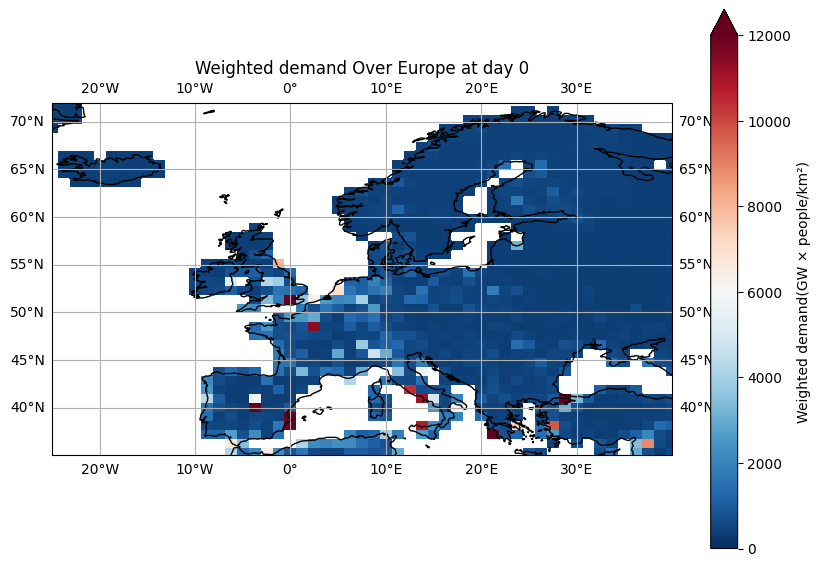

c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


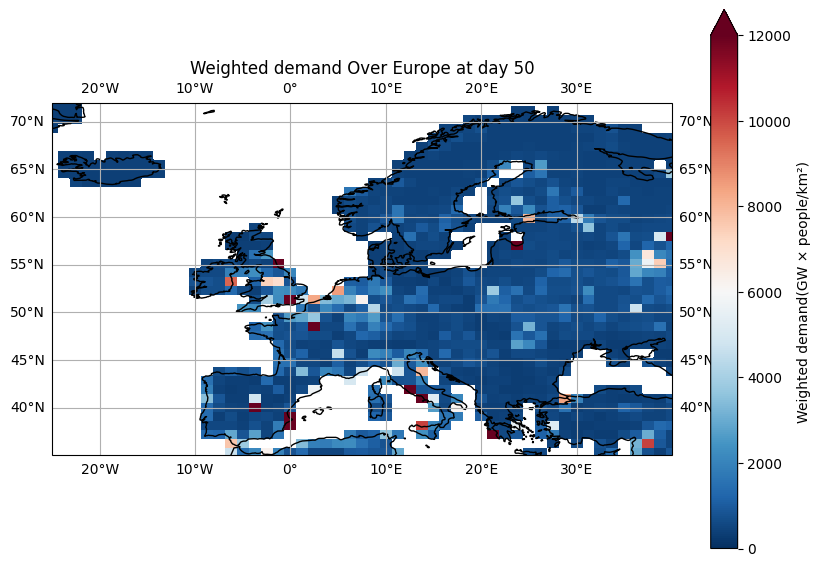

c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


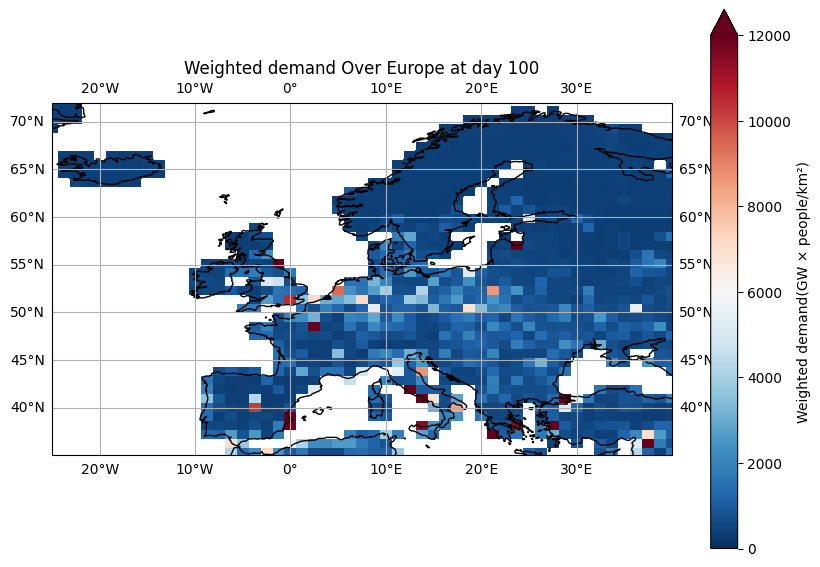

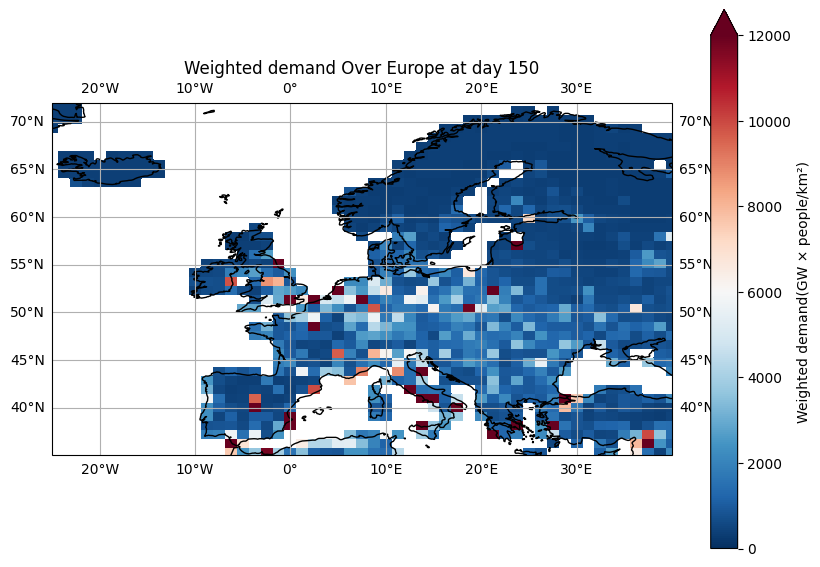

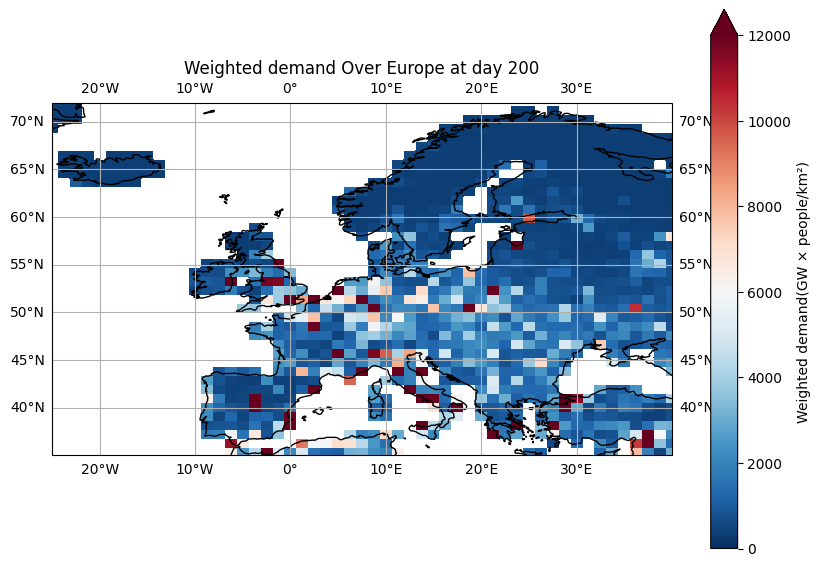

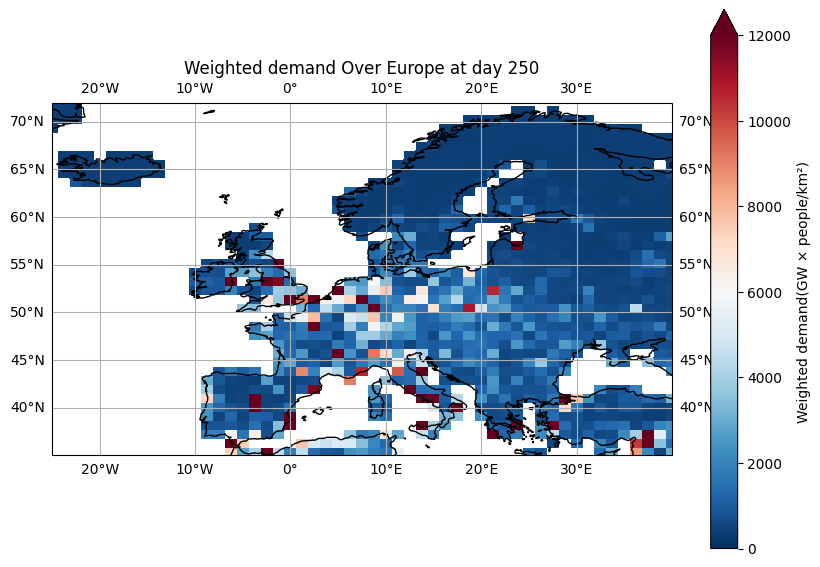

c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


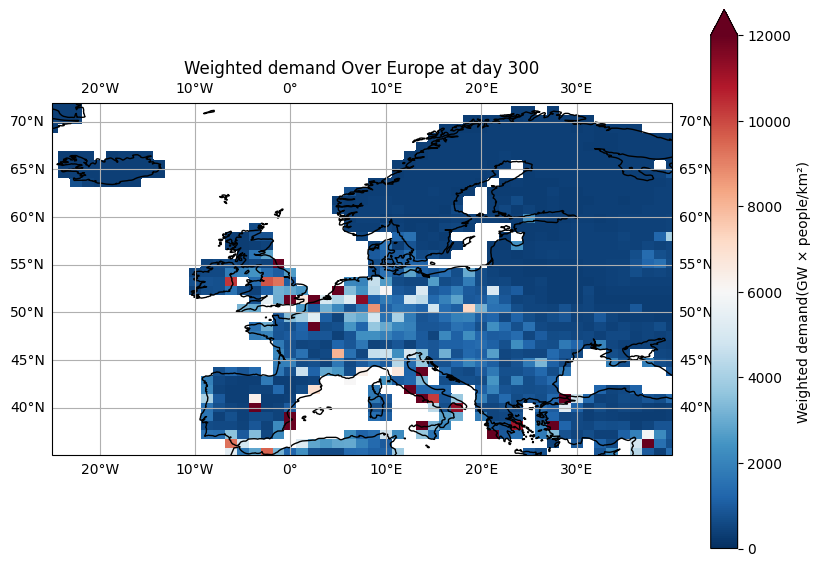

c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


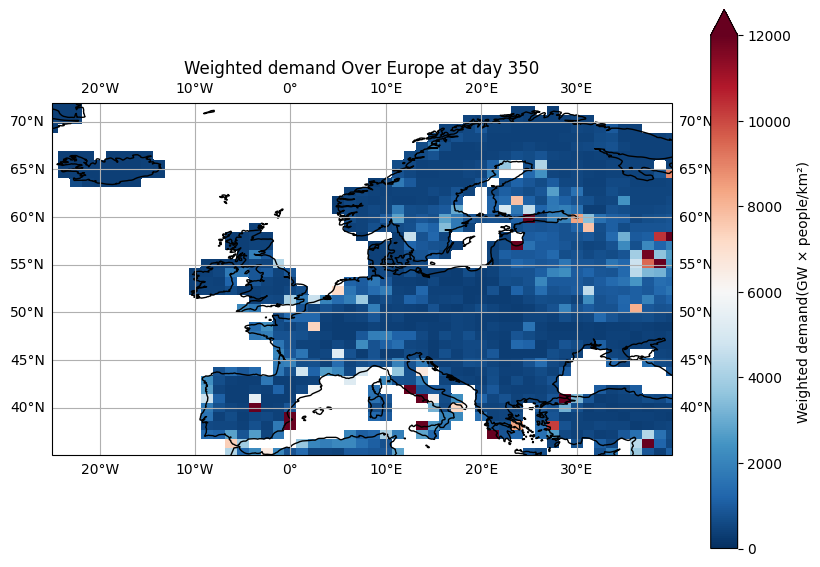

In [126]:

# Clip the values between 0 and 2000 for scenario_pop
population = population.clip(0, 2000)

# Variable name for population data
var = "Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"
days = [0, 50, 100, 150, 200, 250, 300, 350]
for i in days:
    # Select a single time step for temperature and population
    temp = temperature.TSA.isel(time=i)
    pop = population[var].isel(time=0)

    # Interpolate population data to match the temperature grid
    pop_interp = pop.interp(latitude=temp.lat, longitude=temp.lon, method='nearest')

    # Convert temperature from Kelvin to Celsius
    temp_celsius = temp - 273.15

    # Compute weighted temperature
    temp_weighted = temp_celsius * pop_interp

    # Parameters
    alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
    alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
    zeta, c = 0.52, 11.17         # 1/°C and °C

    # Calculate the F(t) and Demand(t) values
    F_t = 1 / (1 + np.exp(-zeta * (temp_weighted - c)))  # Smoothing function

    # Étape 3: Calculer la demande en fonction de T_pop et F(t)
    demand = (alpha_1 + beta_1 * temp_weighted) * (1 - F_t) + (alpha_2 + beta_2 * temp_weighted) * F_t

    # Plotting the weighted temperature
    fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})

    # Set the extent to Europe
    ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe

    # Add map features
    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Plot the weighted temperature data
    c_c = ax.contourf(demand.lon, demand.lat, demand, cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=30)

    # Add a colorbar
    demand.plot(vmin=0, vmax=12000, cmap='RdBu_r', ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Weighted demand(GW × people/km²)'})

    # Title
    ax.set_title(f"Weighted demand Over Europe at day {i}")

    # Show the plot
    plt.show()

Données dans un files

In [115]:
# Clip the values between 0 and 2000 for scenario_pop
population = population.clip(0, 2000)

# Variable name for population data
var = "Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"

# Select a single time step for temperature and population
temp = temperature.TSA
pop = population[var].isel(time=0)

# Interpolate population data to match the temperature grid
pop_interp = pop.interp(latitude=temp.lat, longitude=temp.lon, method='nearest')

# Convert temperature from Kelvin to Celsius
temp_celsius = temp - 273.15

# Compute weighted temperature
temp_weighted = temp_celsius * pop_interp

# Demand 
# Parameters
alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
zeta, c = 0.52, 11.17         # 1/°C and °C

# Calculate the F(t) and Demand(t) values
F_t = 1 / (1 + np.exp(-zeta * (temp_weighted - c)))  # Smoothing function

# Étape 3: Calculer la demande en fonction de T_pop et F(t)
demand = (alpha_1 + beta_1 * temp_weighted) * (1 - F_t) + (alpha_2 + beta_2 * temp_weighted) * F_t




c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


In [116]:
# Étape 4: Sauvegarder les résultats dans un fichier NetCDF
output_files = 'weighted_demand_europe.nc'
demand.to_netcdf(output_files)

PermissionError: [Errno 13] Permission denied: 'c:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\weighted_demand_europe.nc'

In [117]:
path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\weighted_demand_europe.nc"
demand1 = xr.open_dataset(path)
print(demand1)
print(demand1.values)


<xarray.Dataset> Size: 400MB
Dimensions:                        (time: 36500, lon: 57, lat: 48)
Coordinates:
  * time                           (time) object 292kB 0001-01-01 10:30:01 .....
  * lon                            (lon) float32 228B -25.0 -23.75 ... 45.0
  * lat                            (lat) float32 192B 30.63 31.57 ... 74.92
    latitude                       (lat) float32 192B ...
    longitude                      (lon) float32 228B ...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float32 399MB ...
<bound method Mapping.values of <xarray.Dataset> Size: 400MB
Dimensions:                        (time: 36500, lon: 57, lat: 48)
Coordinates:
  * time                           (time) object 292kB 0001-01-01 10:30:01 .....
  * lon                            (lon) float32 228B -25.0 -23.75 ... 45.0
  * lat                            (lat) float32 192B 30.63 31.57 ... 74.92
    latitude                       (lat) float32 192B ...
    longitude           

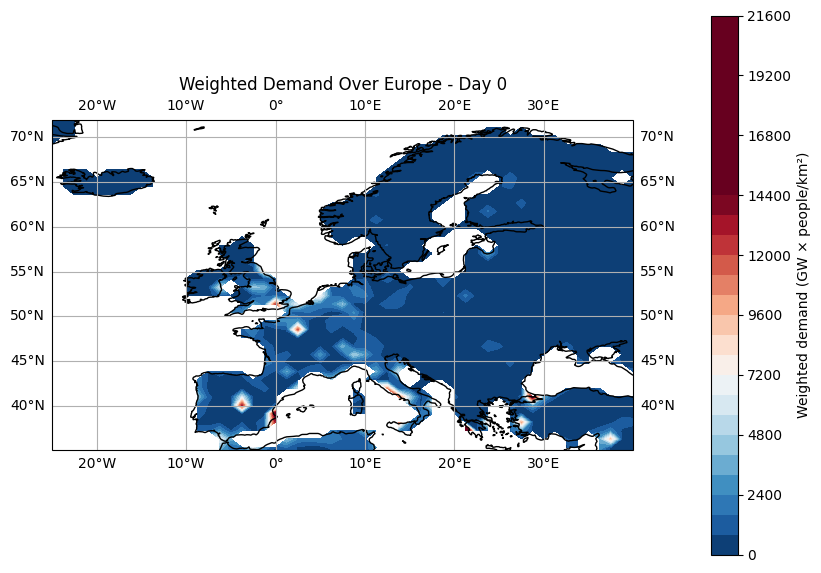

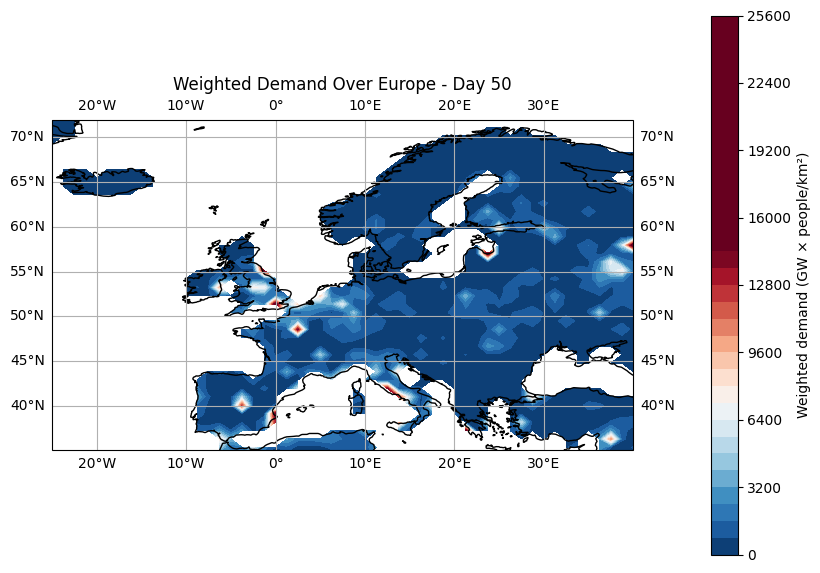

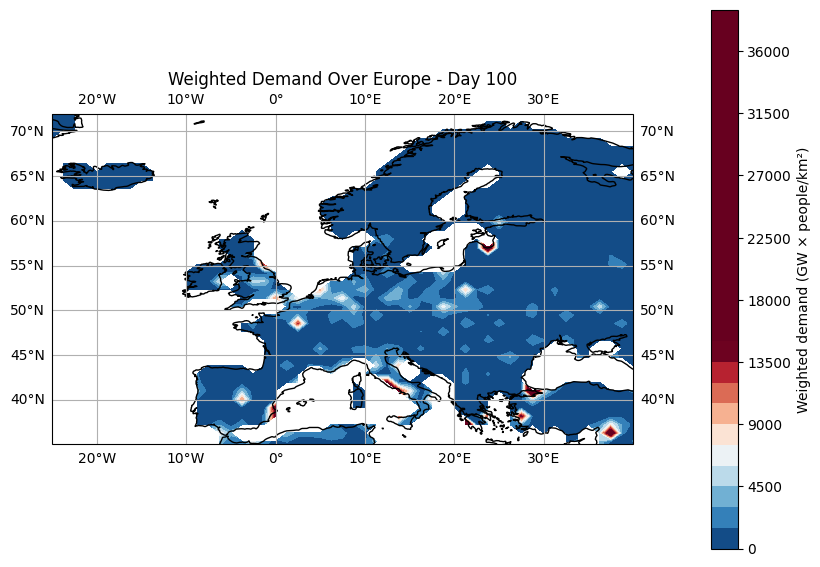

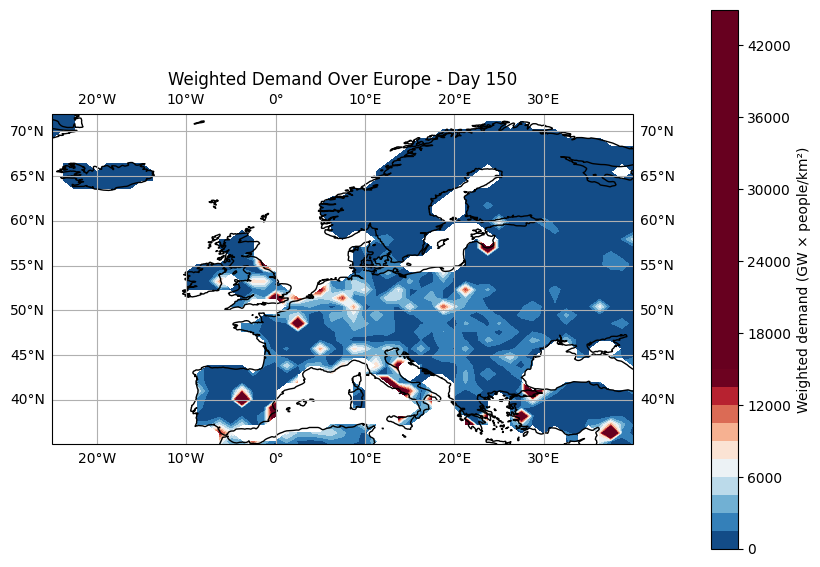

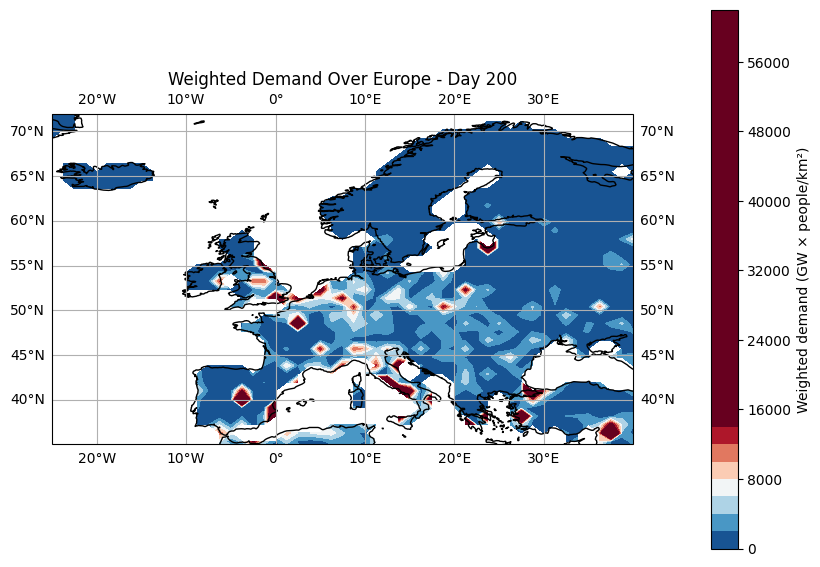

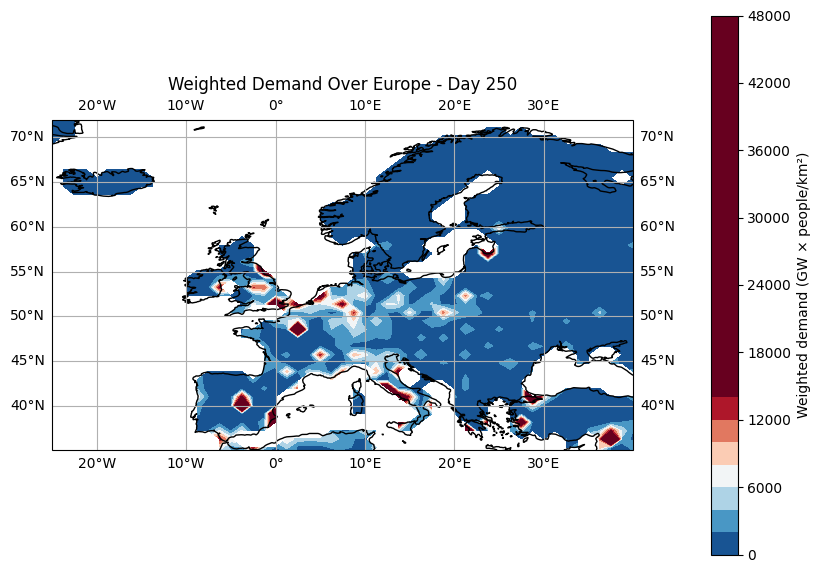

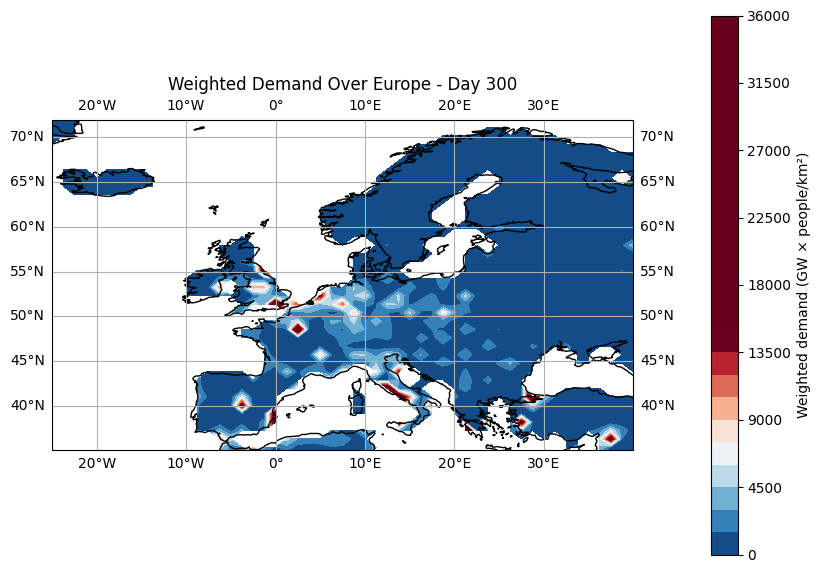

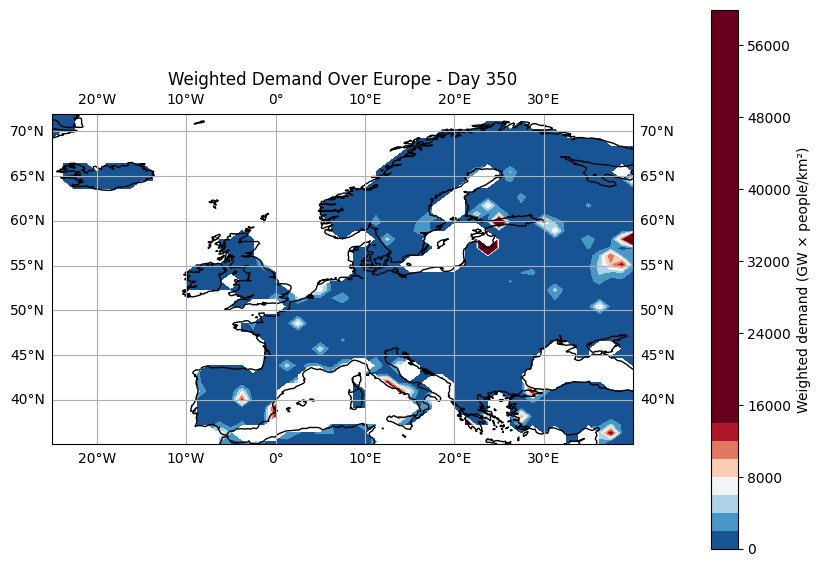

In [118]:

# Variable name for population data
var = "__xarray_dataarray_variable__"

# Create a list of days

days = [0, 50, 100, 150, 200, 250, 300, 350]
for i in days:
    fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Set the extent to Europe
    ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe
    
    # Add map features
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    
    # Plot the weighted temperature data
    c_c = ax.contourf(demand1.lon, demand1.lat, demand1[var].isel(time=i), cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=30, vmax=14400)
    # Add a colorbar
    fig.colorbar(c_c, ax=ax, orientation='vertical', label='Weighted demand (GW × people/km²)', pad=0.1)  
    ax.set_title(f"Weighted Demand Over Europe - Day {i}")
    
    # Show the plot
    plt.show()

Weighted demand sur 1000 ans

In [ ]:


# File paths
path_population = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\region_mask\gpw_v4_population_density_rev11_30_min_2020.nc"
batch_folder = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA"

# Load population dataset
population = xr.open_dataset(path_population)
population = population.clip(0, 2000)

# Variable name for population data
var = "Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"
pop = population[var].isel(time=0)

# Parameters for demand calculation
alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
zeta, c = 0.52, 11.17         # 1/°C and °C

# Initialize a list to store computed demand datasets
demand_list = []

# Loop through batch files
for batch_num in range(1, 11):  # From 0001 to 0010
    batch_file = f"{batch_folder}/TSA_{batch_num:04d}.nc"  # Format: TSA_0001.nc, TSA_0002.nc, etc.
    print(f"Processing {batch_file}...")
    
    # Load temperature data
    temperature = xr.open_dataset(batch_file)
    temp = temperature.TSA

    # Interpolate population data to match the temperature grid
    pop_interp = pop.interp(latitude=temp.lat, longitude=temp.lon, method='nearest')

    # Convert temperature from Kelvin to Celsius
    temp_celsius = temp - 273.15

    # Compute weighted temperature
    temp_weighted = temp_celsius * pop_interp

    # Compute F(t)
    F_t = 1 / (1 + np.exp(-zeta * (temp_weighted - c)))

    # Compute demand
    demand = (alpha_1 + beta_1 * temp_weighted) * (1 - F_t) + (alpha_2 + beta_2 * temp_weighted) * F_t
    
    # Add time dimension to distinguish batches
    demand = demand.assign_coords(batch=batch_num)
    demand_list.append(demand)

# Combine all demand data into one dataset along a new 'batch' dimension
combined_demand = xr.concat(demand_list, dim='batch')

# Save the combined demand to a NetCDF file
output_file = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\weighted_demand_europe_1000y.nc"
combined_demand.to_netcdf(output_file)
print(f"Combined demand saved to {output_file}")


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0001.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0002.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0003.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0004.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0005.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0006.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0007.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0008.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0009.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


Processing C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA/TSA_0010.nc...


c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\core\computation.py:824: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)
c:\Users\flore\anaconda3\envs\thesis\Lib\site-packages\xarray\coding\times.py:191: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


Combined demand saved to C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\weighted_demand_europe_1000y.nc


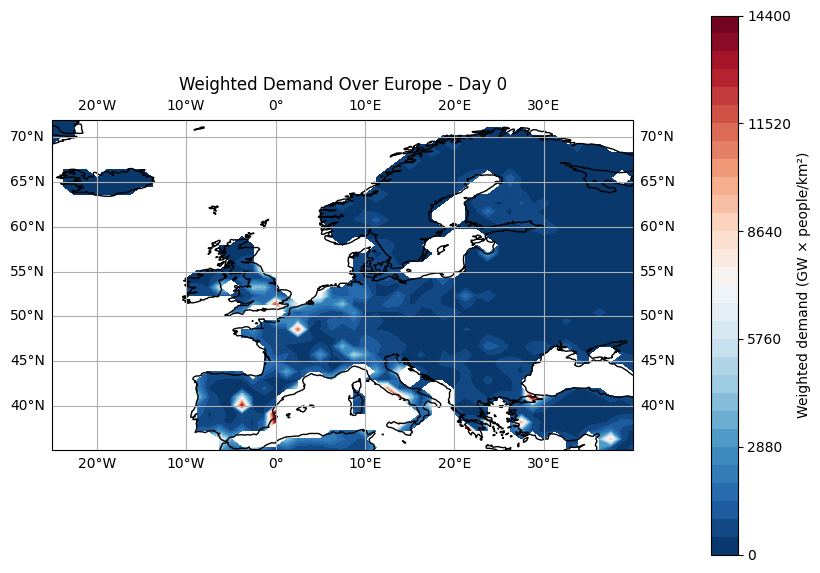

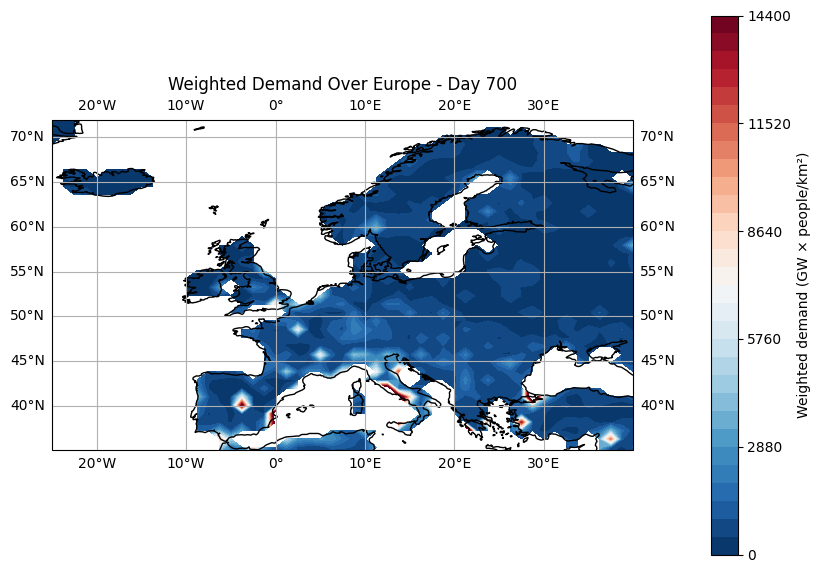

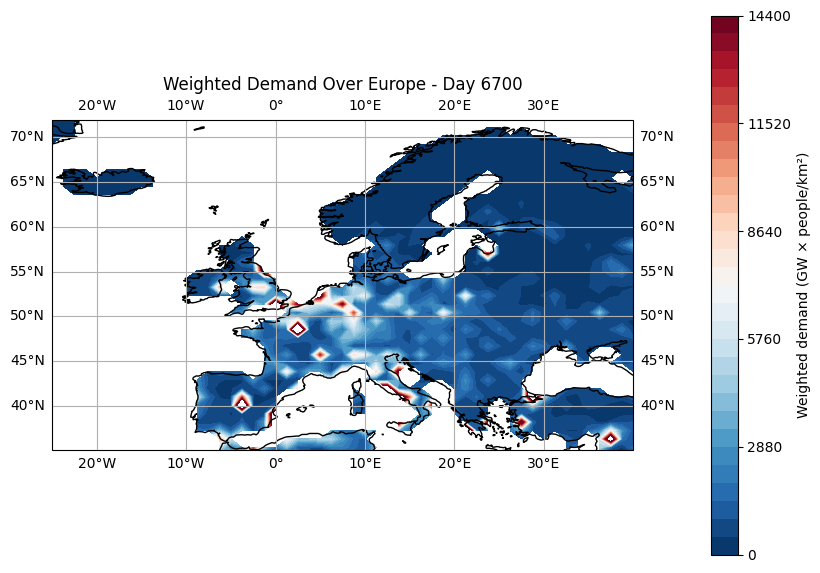

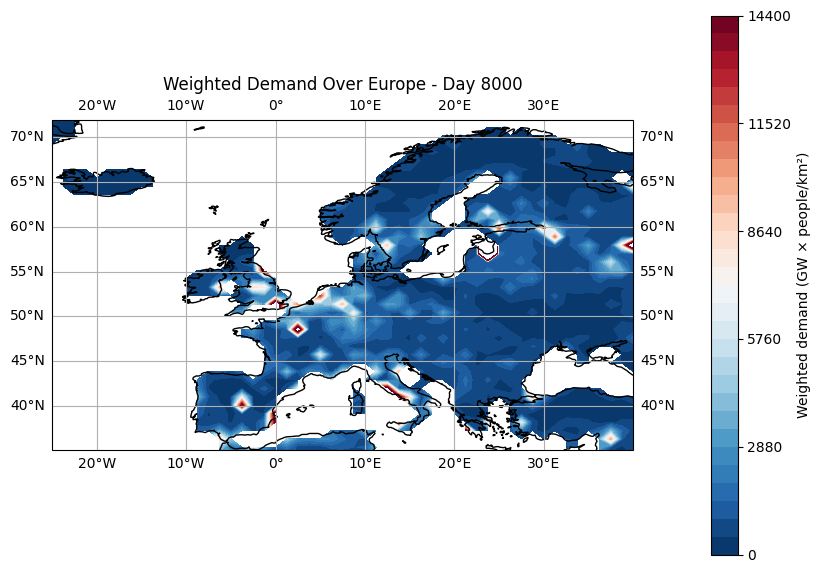

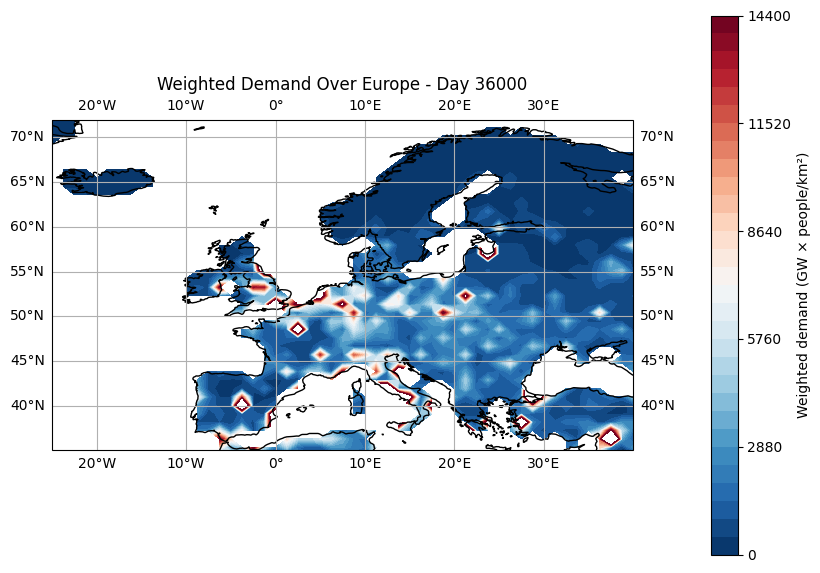

In [141]:
path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\weighted_demand_europe_1000y.nc"
demand1000 = xr.open_dataset(path)
# Variable name for demand data
var = "__xarray_dataarray_variable__"

# Define color levels explicitly
vmin, vmax = 0, 14400
levels = np.linspace(vmin, vmax, 31)  # 31 levels between vmin and vmax

# Create a list of days
days = [0, 700, 6700, 8000, 36000]
for i in days:
    fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Set the extent to Europe
    ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe
    
    # Add map features
    ax.coastlines()
    ax.gridlines(draw_labels=True)
       
    c_c = ax.contourf(
        demand1000.lon, demand1000.lat, 
        demand1000[var].isel(batch=0, time=i), 
        cmap='RdBu_r', transform=ccrs.PlateCarree(), 
        levels=levels, vmin=vmin, vmax=vmax
    )
    
    # Add a colorbar
    cbar = fig.colorbar(c_c, ax=ax, orientation='vertical', label='Weighted demand (GW × people/km²)', pad=0.1)
    cbar.set_ticks(np.linspace(vmin, vmax, 6))  # Adjust the ticks on the colorbar
    
    # Set title
    ax.set_title(f"Weighted Demand Over Europe - Day {i}")
    
    # Show the plot
    plt.show()
    
    

autres a trier

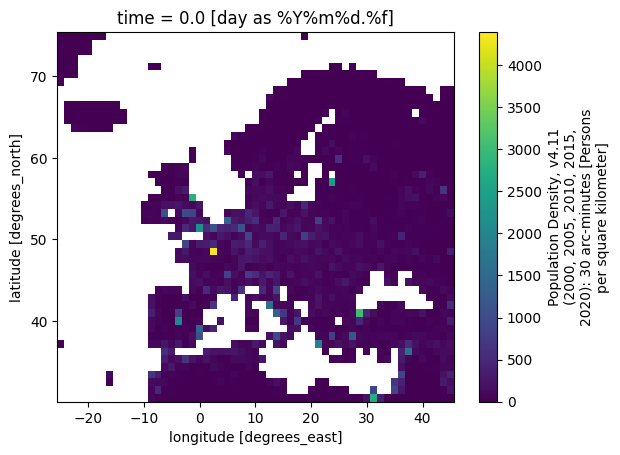

In [37]:
path_pop_raw = r"data\region_mask\gpw_v4_population_density_rev11_30_min_2020.nc"

# Load the population data 
pop_raw = xr.open_dataset(path_pop_raw, engine='netcdf4').isel(time=0)
pop_interp = pop_raw.interp(latitude=temp.lat, longitude=temp.lon, method='nearest')
var="Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"
pop_interp[var].plot()


In [56]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# File paths
scenario_X7_path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\region_mask\pop_per_grid_point.nc"
scenario_path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA_0010.nc"

# Load datasets
scenario_pop = xr.open_dataset(scenario_X7_path)
scenario_temp = xr.open_dataset(scenario_path)

# Remove the largest value in population data to improve color scaling (optional step)
scenario_pop = scenario_pop.clip(0, 7)

# Variable name for population data
var = "Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"

# Select a single time step for temperature and population
temp = scenario_temp.TSA
pop = scenario_pop[var].isel(time=0)

# Interpolate population data to match the temperature grid
pop_interp = pop.interp(lat=temp.lat, lon=temp.lon, method='nearest')

# Convert temperature from Kelvin to Celsius
temp_celsius = temp - 273.15

# Compute weighted temperature by multiplying temp_celsiuis with the constant mask pop_interp
# count the number of pixels that are not Nans
N_pixels = np.sum(~np.isnan(pop_interp))
print("N_pixels: ", N_pixels)
temp_weighted = N_pixels * temp_celsius * pop_interp / np.sum(pop_interp)

# Constants
# Parameters
alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
zeta, c = 0.52, 11.17         # 1/°C and °C

# Calculate the F(t) and Demand(t) values
F_t = 1 / (1 + np.exp(-zeta * (temp_weighted - c)))  # Smoothing function

# Étape 3: Calculer la demande en fonction de T_pop et F(t)
demand = (alpha_1 + beta_1 * temp_weighted) * (1 - F_t) + (alpha_2 + beta_2 * temp_weighted) * F_t

N_pixels:  <xarray.DataArray 'Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes' ()> Size: 8B
array(1657)
Coordinates:
    time     float64 8B 0.0


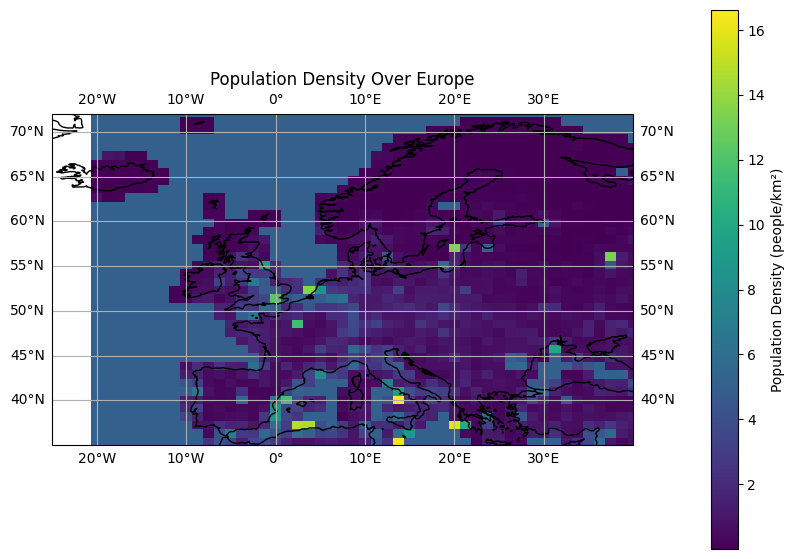

In [71]:
# plot the pop_interp data
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the extent to Europe
ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe
# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)

scenario_pop = xr.open_dataset(scenario_X7_path)
pop = scenario_pop[var].isel(time=0)
# pop_clip = pop.clip(0, 10)
# instead if pop > 20 and not NaN put that at 5
pop_clip = pop.where((pop < 20 ) & (pop > 0), 5)
pop_clip_interp = pop_clip.interp(lat=temp.lat, lon=temp.lon, method='nearest')


# Plot the weighted temperature data
c_c = ax.pcolormesh(pop_clip_interp.lon, pop_clip_interp.lat, pop_clip_interp, cmap='viridis', transform=ccrs.PlateCarree(), shading='auto')

# Add a colorbar
fig.colorbar(c_c, ax=ax, orientation='vertical', label='Population Density (people/km²)', pad=0.1)

# Title
ax.set_title("Population Density Over Europe")

# Show the plot
plt.show()

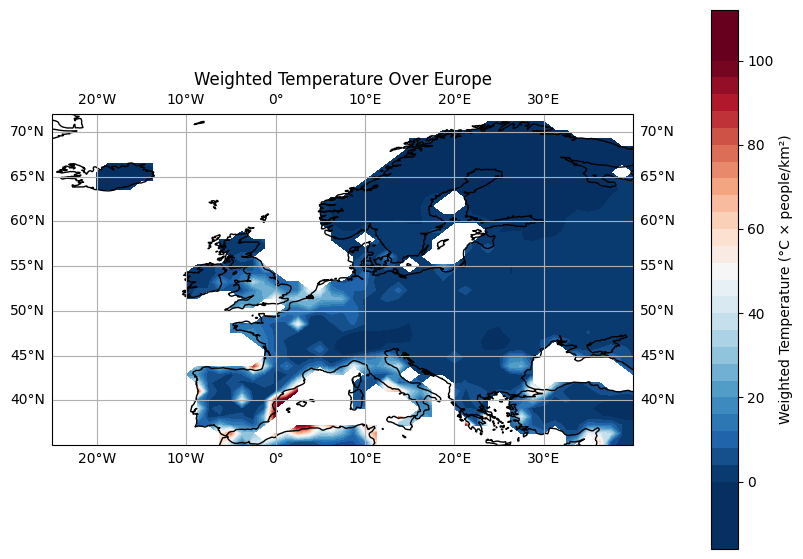

In [57]:
# plot on a map the weighted temperature for a particular time step
# Create the plot
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the extent to Europe
ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe
# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot the weighted temperature data with countourf
vmin=0
vmax=100
c_c = ax.contourf(temp.lon, temp.lat, temp_weighted.isel(time=0)
                , cmap='RdBu_r', transform=ccrs.PlateCarree(), levels=30, vmin=vmin, vmax=vmax)
# Add a colorbar
fig.colorbar(c_c, ax=ax, orientation='vertical', label='Weighted Temperature (°C × people/km²)', pad=0.1, ticks=np.linspace(vmin, vmax, 6))
# Title
ax.set_title("Weighted Temperature Over Europe")

# Show the plot
plt.show()

    

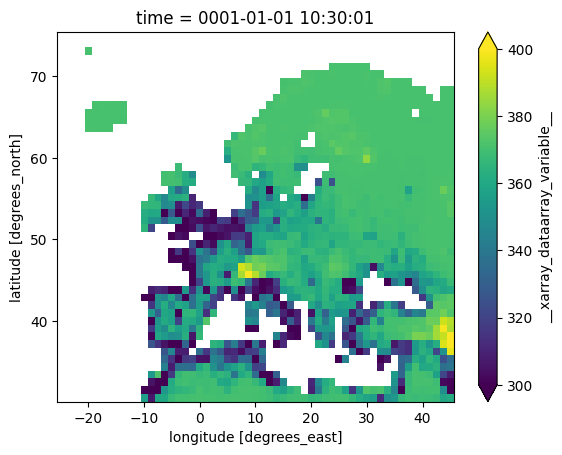

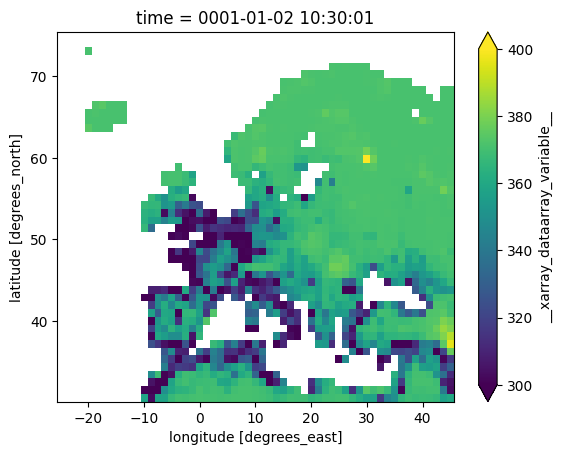

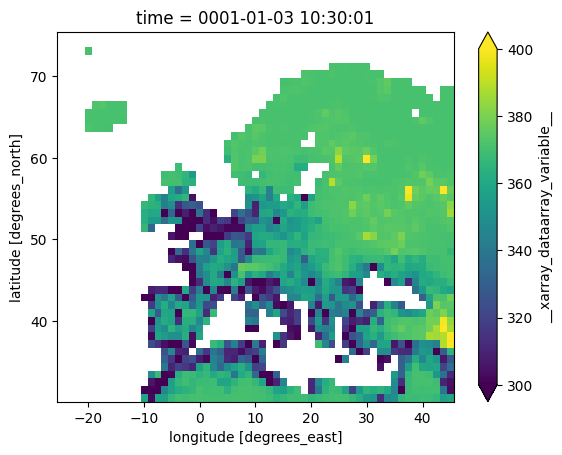

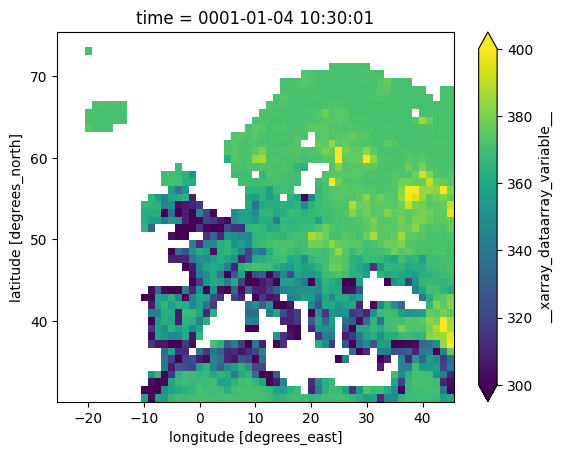

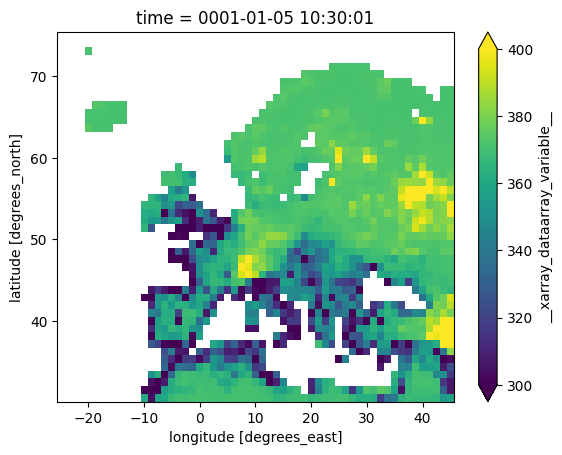

In [81]:
# load the data
demand = xr.open_dataset("test.nc")
for i in range(5):
    demand.__xarray_dataarray_variable__.isel(time=i).plot(vmin=300, vmax=400)
    plt.show()


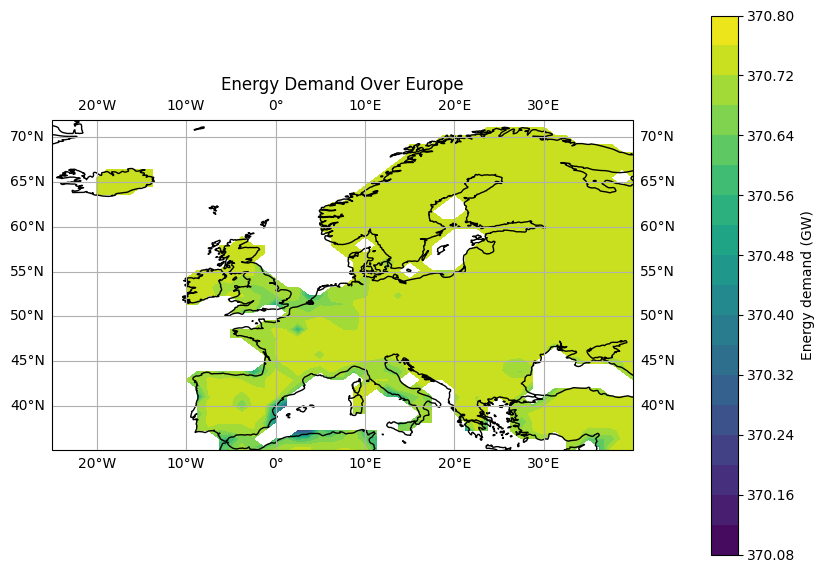

In [41]:
# Plotting the demand
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent to Europe
ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe

# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot the demand data with contourf
# select a particular time step
demand_t = demand.isel(time=0)
c_c = ax.contourf(temp.lon, temp.lat, demand_t, cmap='viridis', transform=ccrs.PlateCarree(), levels=20)

# Add a colorbar
fig.colorbar(c_c, ax=ax, orientation='vertical', label='Energy demand (GW)', pad =0.1)

# Title
ax.set_title("Energy Demand Over Europe")

# Show the plot
# delete grid 
plt.grid(False)
plt.show()

Premier code pour creer demand /grid point


In [7]:
import xarray as xr
import numpy as np
import pandas as pd

# File paths
scenario_pop_path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\region_mask\pop_per_grid_point.nc"
scenario_path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA_0010.nc"
output_nc_path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\demand_per_grid_point.nc"
output_excel_path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\demand_per_grid_point.xlsx"

# Load datasets
scenario_pop = xr.open_dataset(scenario_pop_path)
scenario_temp = xr.open_dataset(scenario_path)

# Variable name for population data
var = "Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"

# Interpolate population data to match the temperature grid (no time dimension in population)
pop = scenario_pop[var]
pop_interp = pop.interp(lat=scenario_temp.lat, lon=scenario_temp.lon, method='nearest')

# Align population data with the time dimension in temperature
pop_broadcast = pop_interp.broadcast_like(scenario_temp.TSA)

# Convert temperature from Kelvin to Celsius
temp_celsius = scenario_temp.TSA - 273.15

# Compute weighted temperature
temp_weighted = temp_celsius * pop_broadcast

# Constants for demand calculation
alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
zeta, c = 0.52, 11.17         # 1/°C and °C

# Calculate F(t) and demand(t)
F_t = 1 / (1 + np.exp(-zeta * (temp_weighted - c)))
demand_t = (alpha_1 + beta_1 * temp_weighted) * (1 - F_t) + (alpha_2 + beta_2 * temp_weighted) * F_t

# Create a new dataset for the demand
demand_ds = xr.Dataset(
    {
        "demand": (["time", "lat", "lon"], demand_t.values),
    },
    coords={
        "time": scenario_temp.time.values,
        "lat": scenario_temp.lat.values,
        "lon": scenario_temp.lon.values,
    },
)

# Save the dataset to a NetCDF file
demand_ds.to_netcdf(output_nc_path)
print(f"Demand data saved to {output_nc_path}")


print("Population interpolée (pop_interp):")
print(pop_interp)
print("NaN dans pop_interp :", np.isnan(pop_interp).sum())
print("Population diffusée (pop_broadcast):")
print(pop_broadcast)
print("NaN dans pop_broadcast :", np.isnan(pop_broadcast).sum())
print("Température pondérée (temp_weighted):")
print(temp_weighted)
print("NaN dans temp_weighted :", np.isnan(temp_weighted).sum())
print("Demande énergétique (demand_t):")
print(demand_t)
print("NaN dans demand_t :", np.isnan(demand_t).sum())
print("NaN dans scenario_pop :", np.isnan(scenario_pop[var]).sum())
print("NaN dans scenario_temp :", np.isnan(scenario_temp.TSA).sum())




Demand data saved to C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\demand_per_grid_point.nc
Population interpolée (pop_interp):
<xarray.DataArray 'Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes' (
                                                                                              time: 1,
                                                                                              lat: 48,
                                                                                              lon: 57)> Size: 11kB
array([[[       nan,        nan,        nan, ..., 0.10693755,
         0.34275314, 0.24507529],
        [       nan,        nan,        nan, ..., 0.02590511,
         0.6789016 , 2.2040732 ],
        [       nan,        nan,        nan, ..., 0.0492576 ,
         3.1592042 , 2.548873  ],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,      